# DATA ANALYSIS OF RETAILER X

## importing files

In [2]:
import pandas as pd

In [3]:
product_data = pd.read_csv('Product Data Set - Student 2 of 3.csv',sep ='|')

In [4]:
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [5]:
product_data.to_csv('product_modified.csv')

In [6]:
transaction_data = pd.read_csv('Transaction Data Set - Student 3 of 3.csv',sep='|')

In [7]:
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [8]:
customer_data = pd.read_csv('Customer Data Set - Student 1 of 3.csv')

In [9]:
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,6/3/2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,2/9/2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,6/4/2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


## Understanding Our Data

In [10]:
customer_data.shape #this will show how many customers Retailer X has 

(500, 9)

In [11]:
transaction_data.shape #this shows that retailer x recorded 10000 transactions

(10000, 6)

In [12]:
product_data.shape #products sold by retailer x

(30, 3)

In [13]:
customer_data.isnull().values.any()


True

In [14]:
customer_data[customer_data.isnull().values.any(axis=1)].head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single
5,10006,1,63,"$132,893",1,notenrolled,NaN,4,Married
9,10010,0,36,"$76,994",2,notenrolled,NaN,2,Married
10,10011,0,18,"$20,256",6,notenrolled,NaN,2,Married


In [15]:
transaction_data.isnull().values.any()


False

In [16]:
product_data.isnull().values.any()

False

In [17]:
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [18]:
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [19]:
type(customer_data)

pandas.core.frame.DataFrame

In [20]:
type(customer_data['AGE'])

pandas.core.series.Series

In [21]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

## cleaning our data to conform to the datatype

In [22]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace('$',''))

#### Replacing the ',' in our income so it no more a string type and converting it to an interger

In [23]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

In [24]:
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,6/3/2013,4,Single
1,10002,0,42,94475,9,notenrolled,NaN,6,Married
2,10003,0,40,88610,9,enrolled,2/9/2010,5,Married
3,10004,0,38,84313,8,enrolled,6/4/2015,1,Single
4,10005,0,30,51498,3,notenrolled,NaN,1,Single


In [25]:
customer_data['MARITAL STATUS'].describe()

count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

##### checking the unique characters of our Marital status column which is a Nominal categorical column 

In [26]:
customer_data['MARITAL STATUS'].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

##### converting the Enrollment Date column to a Datetime object. We must first import the datetime library 

In [27]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

###### seeing that some values in the enrollment date are NaN, we need to convert only the NOT null values by adding a filter condition to our dataframe column.

In [28]:
from datetime import datetime
customer_data['ENROLLMENT DATE'] = customer_data['ENROLLMENT DATE'][customer_data['ENROLLMENT DATE'].notnull()].map(lambda x: x.replace('/','-'))

In [29]:
customer_data['ENROLLMENT DATE'] = \
customer_data['ENROLLMENT DATE'][customer_data['ENROLLMENT DATE'].notnull()].map(lambda x :datetime.strptime(x,'%d-%m-%Y'))

In [30]:
customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

##### checking the Data Quality of our data

In [31]:
print('is transaction data containing missing values?', transaction_data.isnull().values.any())
print('is customer data containing missing values?' , customer_data.isnull().values.any())
print('is product data containing missing values?' , product_data.isnull().values.any())

is transaction data containing missing values? False
is customer data containing missing values? True
is product data containing missing values? False


In [32]:
customer_data.isnull().sum()

CUSTOMERID            0
GENDER                0
AGE                   0
INCOME                0
EXPERIENCE SCORE      0
LOYALTY GROUP         0
ENROLLMENT DATE     236
HOUSEHOLD SIZE        0
MARITAL STATUS        0
dtype: int64

## Analysis of Distribution of Variables Using Graphs

In [33]:
import matplotlib.pyplot as plt

#### Univariate analysis
Analyzing the frequency of the variables we have, starting from Marital status, lets see the frequency of the Married and Unmarried customers 

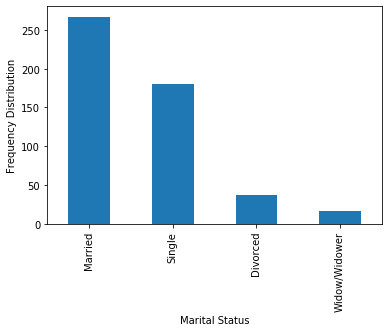

In [34]:
customer_data['MARITAL STATUS'].value_counts().plot(kind='bar')
plt.xlabel("Marital Status")
plt.ylabel("Frequency Distribution")
plt.show()


we can see that more than half of the customers are married, this might affect their spending decisions.

2) Lets look at customer age distribution by plotting a histogram

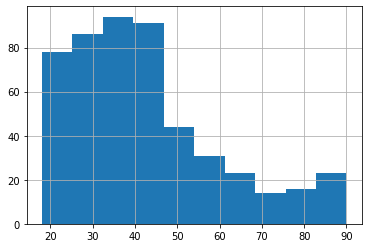

In [35]:
customer_data['AGE'].hist(bins = 10)
plt.show()

3) doing a box plot for customer age 

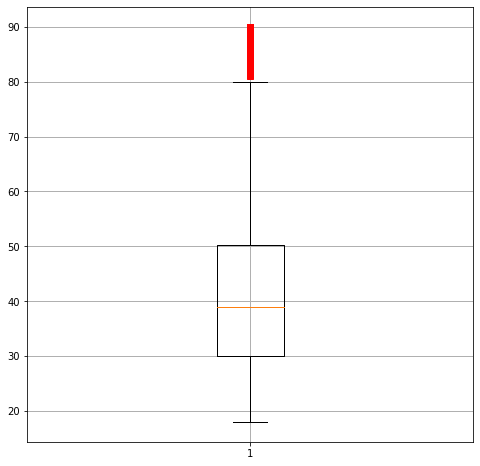

In [36]:

plt.figure(figsize=(8,8))
plt.boxplot(customer_data.AGE,0,'rs',1)
plt.grid(linestyle='-',linewidth=1)
plt.show()

In [37]:
customer_data.AGE.describe()

count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

### CREATING A CUSTOMER VIEW 

FROM OUR BUSINESS UNDERSTANDING, Retailer X wants to understand the factors that are associated with Loyalty program participation
and also know the Factors that are associated with increased spending in the store.

In [38]:
customer_data.head(3)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single
1,10002,0,42,94475,9,notenrolled,NaT,6,Married
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married


In [39]:
transaction_data.head(3)

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0


In [40]:
product_data.head(3)

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49


seeing that our transaction data doesn't contain the product category and price, we can merge both tables.

In [41]:
trans_product = transaction_data.merge(product_data,how='inner',left_on='PRODUCT NUM',right_on='PRODUCT CODE')

In [42]:
trans_product.head(3)

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46


In [43]:
trans_product.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE        object
dtype: object

###### changing the data type of Unit list price to an Int 

In [44]:
trans_product['UNIT LIST PRICE'] = trans_product['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [45]:
trans_product.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
dtype: object

In [46]:
trans_product.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46


#### now we need to get the total price of the quantity purchased factoring in the discount. We do this by creating a new column for Total Price.

In [47]:
trans_product['TOTAL PRICE'] = trans_product['QUANTITY PURCHASED'] * trans_product['UNIT LIST PRICE'] * (1-trans_product['DISCOUNT TAKEN'])

In [48]:
trans_product.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


##### Now let us Group by category to get the highest selling category

In [49]:
income_by_category = trans_product.groupby('PRODUCT CATEGORY').agg({'TOTAL PRICE':sum}).sort_values('TOTAL PRICE',ascending=False)

In [50]:
income_by_category.head()

,TOTAL PRICE
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


#### RENAME THE COLUMN OF THE TOTAL PRICE TO REVENUE PER PRODUCT

In [51]:
Revenue_by_product = income_by_category.rename(columns = {'TOTAL PRICE': 'REVENUE PER PRODUCT'})

In [52]:
income_by_category.head()

,TOTAL PRICE
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


In [53]:
Revenue_by_product

,REVENUE PER PRODUCT
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


##### drawing a pie chart to represent the revenue per product

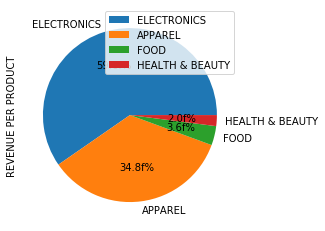

In [54]:
Revenue_by_product['REVENUE PER PRODUCT'].plot(kind='pie',autopct='%1.1ff%%',legend=True)

#### From our business undersatnding, we need to see factors that will affect loyalty program participation.
we will examine:
1) customer spends per category
2) Total spends 
3) Most recent Transaction dates
4) Average discount taken

In [55]:
trans_product.head(2)

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.84
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.76


In [56]:
customer_spend_category = trans_product.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'TOTAL PRICE':sum})

In [57]:
customer_spend_category.head()

TOTAL PRICE
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

##### making the customer spend category dataframe assemble to columns

In [58]:
customer_spend_category.columns

Index(['TOTAL PRICE'], dtype='object')

##### we can see that its only the Total Price column that is shown, This is because when you do the group by function on some columns they change to a multi or hierachical. We can change it by using Reset_index() method

In [59]:
customer_spend_category = customer_spend_category.reset_index()

In [60]:
customer_spend_category.head()

,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL PRICE
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


In [61]:
customer_spend_category.head()

,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL PRICE
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


#### Let us further reorganize the table show it shows the spend summary for each customer Horizontally, We use the pivot method

In [62]:
customer_pivot = customer_spend_category.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='TOTAL PRICE')

In [63]:
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


getting the most recent transaction dates 

In [64]:
trans_product.head(2)

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.84
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.76


In [65]:
trans_product['TRANSACTION DATE']=trans_product['TRANSACTION DATE'].map(lambda x: datetime.strptime(x,'%m/%d/%Y'))

In [66]:
recent_trans = trans_product.groupby('CUSTOMER NUM').agg({'TRANSACTION DATE':max,'TOTAL PRICE':sum}).rename(columns={'TRANSACTION DATE':'RECENT TRANSACTION DATE','TOTAL PRICE':'TOTAL SPENT'})

In [67]:
recent_trans.head()

,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,
10001,2015-12-24,6826.770
10002,2015-12-21,5062.451
10003,2015-12-31,8562.440
10004,2015-12-17,5522.694
10005,2015-12-22,213.512


#### creating a new view for customer, we are going to join the recent trans table with the customer pivot.

In [68]:
customer_KPI = customer_pivot.merge(recent_trans,how='inner',left_index=True,right_index=True)

In [69]:
customer_KPI.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
10005,213.512,NaN,NaN,NaN,2015-12-22,213.512


In [70]:
customer_KPI.isnull().values.any()

True

In [71]:
customer_KPI.isnull().sum()

APPAREL                      9
ELECTRONICS                104
FOOD                       127
HEALTH & BEAUTY            333
RECENT TRANSACTION DATE      0
TOTAL SPENT                  0
dtype: int64

In [72]:
customer_KPI = customer_KPI.fillna(0)


In [73]:
customer_KPI.isnull().sum()

APPAREL                    0
ELECTRONICS                0
FOOD                       0
HEALTH & BEAUTY            0
RECENT TRANSACTION DATE    0
TOTAL SPENT                0
dtype: int64

#### Lets Augment the whole customer view by joining customer_KPI with the customer data

In [74]:
customer_all_view = customer_data.merge(customer_KPI,how='inner',left_on='CUSTOMERID',right_index=True)

In [75]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512


### BIVARIATE ANALYSIS
now things get a little intresting. From our Buiness problem, we are looking out for factors that affect customer Loyalty Group
This means we are looking for relationship between our different variables and our Target Variable(Loyalty Group)
We will be using a built in pandas cross tab function for comparism of our Loyalty and other Variables.

#### 1) Cross tabulating Gender and Loyalty Group

In [76]:
table = pd.crosstab(customer_all_view['GENDER'],customer_all_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


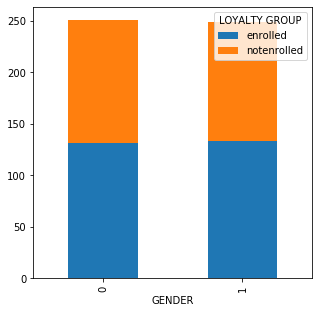

In [77]:
table.plot(kind='bar', stacked=True, figsize=(5,5))
plt.show()

by examining the relationship between Gender and Loyalty Group we can see that being male or female does not affect the enrollment much

#### 2) Let's compare Experience score and Loyalty group 

In [78]:
table = pd.crosstab(customer_all_view['EXPERIENCE SCORE'],customer_all_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
EXPERIENCE SCORE,,
1,0,28
2,0,19
3,0,18
4,0,22
5,43,23
6,48,32
7,49,22
8,42,21
9,44,28


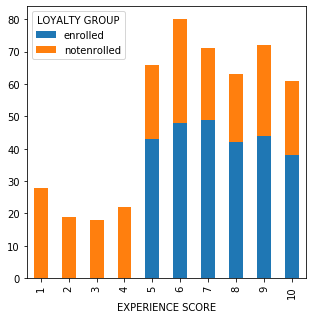

In [79]:
table.plot(kind='bar', stacked=True, figsize=(5,5))
plt.show()

As we can see from the bar plot that the non enrolled customers tend to give lower scores than the enrolled customers. We can tell that the customers that give the lowest scores (1-4) are likely not to enroll. But there is a higher probability that the customers that give higher enrollment scores are likely to enroll.

#### 3) checking relationship between Marital Status and Loyalty group

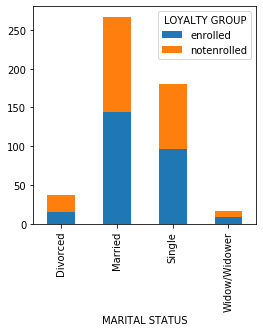

In [80]:
table = pd.crosstab(customer_all_view['MARITAL STATUS'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True , figsize=(4,4))
plt.show()

from our graph above we can see that Marital Status has little or no effect on the Loyalty Group participation.

#### 4) Checking the relationship between Age and Loyalty Group 
Since age is a continuous variable, we will have to bin it using the pandas cut command.

In [81]:
customer_all_view['AGE BINNED'] = pd.cut(customer_all_view['AGE'],10)

In [82]:
customer_all_view['AGE BINNED'].value_counts()

(32.4, 39.6]      94
(39.6, 46.8]      91
(25.2, 32.4]      86
(17.928, 25.2]    78
(46.8, 54.0]      51
(54.0, 61.2]      24
(82.8, 90.0]      23
(61.2, 68.4]      23
(75.6, 82.8]      16
(68.4, 75.6]      14
Name: AGE BINNED, dtype: int64

In [83]:
table = pd.crosstab(customer_all_view['AGE BINNED'],customer_all_view['LOYALTY GROUP'])

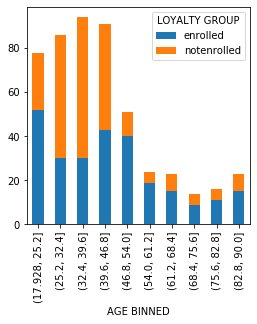

In [84]:
table.plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

from our analysis we can see that the middle aged people are less likely to join the enrollment group and the younger and elderly people are more likely to join.
We can test for the average age for both groups below:

In [85]:
customer_all_view.groupby(customer_all_view['LOYALTY GROUP']).agg({'AGE': 'mean'})

,AGE
LOYALTY GROUP,
enrolled,44.723485
notenrolled,39.622881


This shows that the older people are more inclined to join the Loyalty groups.

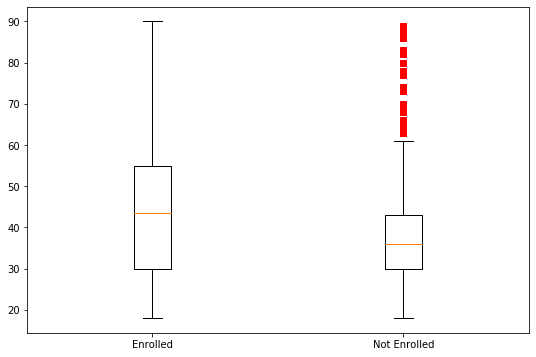

In [86]:
fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot(111)
plot1 = customer_all_view['AGE'][customer_all_view['LOYALTY GROUP']=="enrolled"]
plot2 = customer_all_view['AGE'][customer_all_view['LOYALTY GROUP']=="notenrolled"]
list1 = [plot1,plot2]
ax.boxplot(list1,0,'rs',1)
ax.set_xticklabels(['Enrolled','Not Enrolled'])
plt.show()

The distribution of age for enrolled customers is more dispersed than the same for non-enrolled ones. Enrolled customers have a higher median and quartiles, and a bigger IQR range than their non-enrolled counterparts.

The chart shows that 75% of customers that are enrolled in the loyalty program are below the age of 55, and 75% of non-enrolled customers are below the age of 43.



In [87]:
customer_all_view.head(3)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT,AGE BINNED
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770,"(61.2, 68.4]"
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451,"(39.6, 46.8]"
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440,"(39.6, 46.8]"


#### 5) comparing Total Spend with Loaylty Group

In [88]:
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['TOTAL SPENT'],10)
customer_all_view['TOTAL SPENT BINNED'].value_counts()

(6117.455, 7641.817]      100
(4593.094, 6117.455]       98
(3068.733, 4593.094]       71
(4.766, 1544.371]          68
(7641.817, 9166.178]       59
(1544.371, 3068.733]       56
(9166.178, 10690.539]      29
(10690.539, 12214.9]        9
(12214.9, 13739.262]        7
(13739.262, 15263.623]      3
Name: TOTAL SPENT BINNED, dtype: int64

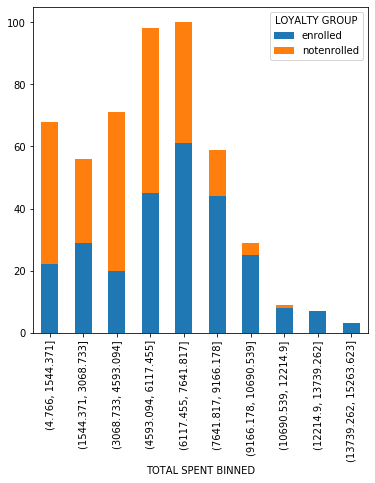

In [89]:
table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar',stacked=True, figsize=(6,6))

from our analysis we can see that the customers that spend the highest are enrolled. As customers spend increases so does tendencies to be  enrolled.

### BIVARIATE ANALYSIS FOR FACTORS THAT ARE RELATED TO CUSTOMER SPEND
1) Starting with a comparism between Age and customer spend

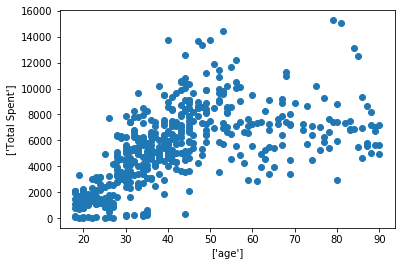

In [195]:
plt.scatter(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])
plt.xlabel(['age'])
plt.ylabel(['Total Spent'])
plt.show()

we can see that there is a correlation between the spent amount and the customers age. 
Lets test it further with pearson correlation coefficient, which measures the strength of the relationship between the relative movement between two numeric variables.

In [91]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])

(0.5760170677259271, 1.5608217502782303e-45)

this shows a relatively strong correlation

2) comparing income with customer spend

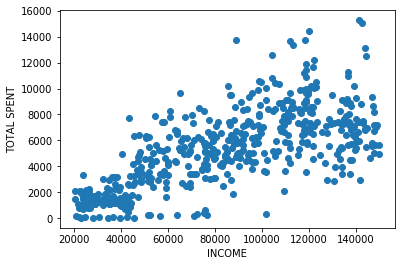

In [92]:
plt.scatter(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])
plt.xlabel('INCOME')
plt.ylabel('TOTAL SPENT')
plt.show()

Here the correlation of Total spending to income is quite visible. Let us measure the strength of correlation.

In [93]:
pearsonr(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])

(0.6880311084625118, 2.322632696381397e-71)

The correlation strength here is pretty strong. The higher a customer's income the more they spend

3) Comparing the experience score with the amount spent
Since the experience score is a categorical feature,and the Total spent is a continuous feature, we can group the mean of the total spent with the experience score.

In [94]:
experience_score_spend = customer_all_view.groupby(customer_all_view['EXPERIENCE SCORE']).agg({'TOTAL SPENT':'mean'}).reset_index()

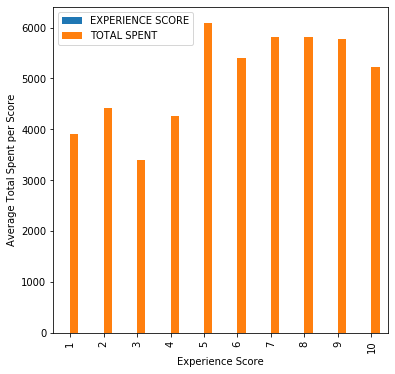

In [95]:
experience_score_spend.plot(kind='bar',figsize=(6,6))
plt.xlabel("Experience Score")
plt.ylabel("Average Total Spent per Score")
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])    
plt.show()


Obviously, customers with experience scores 1 - 4 have a relatively lower average spend than customers with higher experience scores (5 - 10). This indicates some sort of relationship between the two variables.

### REGRESSION ANALYSIS FOR RETAILER X 

#### STEPS
1) Lets feed the following variables into our regression model to predict the Total spent 


In [125]:
DF_input = customer_all_view[['GENDER','AGE','INCOME','EXPERIENCE SCORE','LOYALTY GROUP','HOUSEHOLD SIZE','MARITAL STATUS']]

In [126]:
DF_input.head(2)

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS
0,0,64,133498,5,enrolled,4,Single
1,0,42,94475,9,notenrolled,6,Married


In [127]:
DF_input['MARITAL STATUS'].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

Since our Loyalty Group has only two(2) unique values lets use the a simple function to turn it to a binary series 

In [128]:
DF_input.head(5)


,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS
0,0,64,133498,5,enrolled,4,Single
1,0,42,94475,9,notenrolled,6,Married
2,0,40,88610,9,enrolled,5,Married
3,0,38,84313,8,enrolled,1,Single
4,0,30,51498,3,notenrolled,1,Single


In [129]:
DF_input.loc[DF_input['LOYALTY GROUP'] == 'enrolled', 'Loyalty Group'] = 1
DF_input.loc[DF_input['LOYALTY GROUP']== 'notenrolled','Loyalty Group'] = 0

C:\Users\Mac\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Mac\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [130]:
DF_input.head(5)

,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,HOUSEHOLD SIZE,MARITAL STATUS,Loyalty Group
0,0,64,133498,5,enrolled,4,Single,1.0
1,0,42,94475,9,notenrolled,6,Married,0.0
2,0,40,88610,9,enrolled,5,Married,1.0
3,0,38,84313,8,enrolled,1,Single,1.0
4,0,30,51498,3,notenrolled,1,Single,0.0


In [133]:
DF_input = DF_input.drop(['LOYALTY GROUP'],axis=1)

In [134]:
DF_input.head(3)

,GENDER,AGE,INCOME,EXPERIENCE SCORE,HOUSEHOLD SIZE,MARITAL STATUS,Loyalty Group
0,0,64,133498,5,4,Single,1.0
1,0,42,94475,9,6,Married,0.0
2,0,40,88610,9,5,Married,1.0


#### IMPORTANT: 
Seeing that our scikit learn library only accepts numerical inputs for machine learning , we will need to change our nominal category to numeric using one hot encoding.

#### SEEING WE have only one Nominal categorical value left (Marital Status) we can use the pandas get dummies method on our data frame}

In [135]:
DF_input = pd.get_dummies(DF_input)

One hot encoding is a process of turning a nominal categorical values into numerical format so it can be used for machine learning. to do the one hot encoding we'll be using the get dummies method

In [137]:
DF_input.head(2)

,GENDER,AGE,INCOME,EXPERIENCE SCORE,HOUSEHOLD SIZE,Loyalty Group,MARITAL STATUS_Divorced,MARITAL STATUS_Married,MARITAL STATUS_Single,MARITAL STATUS_Widow/Widower
0,0,64,133498,5,4,1.0,0,0,1,0
1,0,42,94475,9,6,0.0,0,1,0,0


#### STEP 2 
#### SCALING 
Seeing our values differences we will apply the preprocessing scaling technique to build our input values from 0-1 

In [138]:
from sklearn import preprocessing
DF_input_columns = DF_input.columns.values

In [139]:
DF_input_np = preprocessing.minmax_scale(DF_input)

In [141]:
DF_scaled = pd.DataFrame(DF_input_np,columns=DF_input_columns)

In [142]:
DF_scaled.head(3)

,GENDER,AGE,INCOME,EXPERIENCE SCORE,HOUSEHOLD SIZE,Loyalty Group,MARITAL STATUS_Divorced,MARITAL STATUS_Married,MARITAL STATUS_Single,MARITAL STATUS_Widow/Widower
0,0.0,0.638889,0.872818,0.444444,0.6,1.0,0.0,0.0,1.0,0.0
1,0.0,0.333333,0.572046,0.888889,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.305556,0.526842,0.888889,0.8,1.0,0.0,1.0,0.0,0.0


### STEP 3
#### Splitting data into training and splitting

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test,Y_train,Y_test = train_test_split(DF_scaled,customer_all_view['TOTAL SPENT'], test_size =0.2,random_state=42)

### STEP 4 
#### TRAINING WITH LINEAR REGRESSION MODEL 

In [145]:
from sklearn.linear_model import LinearRegression

#### instantiating our linear regression model 

In [146]:
regr = LinearRegression()

#### Training our model 

In [148]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Now that testing is complete, Lets predict the Total spending based on the trained model

In [150]:
Y_pred = regr.predict(X_test)

### STEP 5 
#### Predicting and testing the strengths of Coefficients  

We get the coefficient of our Linear Regression meodel by using the regr.coef_ method

In [154]:
print('Coefficient: \n ', regr.coef_)

Coefficient: 
  [   35.58494877 -7076.18001534 12403.0952701    505.84578936
  1040.19923196  1566.48092344   377.33573376   -82.02665324
   -34.57620088  -260.73287964]


The coefficient are in the same order of our input variables, so we can see the coefficeints that have the maximum impacts on our Target variable

In [160]:
DFS =DF_scaled.columns.values

In [157]:
type(regr.coef_)

numpy.ndarray

In [159]:
RGC = regr.coef_

In [164]:
coef_strength = pd.Series(DFS)

In [165]:
coef_strength.head()

0              GENDER
1                 AGE
2              INCOME
3    EXPERIENCE SCORE
4      HOUSEHOLD SIZE
dtype: object

In [166]:
coef_strength_values = pd.Series(RGC)

In [173]:
coef_all = pd.concat([coef_strength,coef_strength_values],axis=1)

In [171]:
coef_all.head(2)

,0,1
0,GENDER,35.584949
1,AGE,-7076.180015


In [175]:
coef_all.columns.values

array([0, 1], dtype=int64)

In [178]:
coef_all = coef_all.rename(columns={0 : 'Predictor Value', 1:'Coefficient'})

In [180]:
coef_all.head(2)

,Predictor Value,Coeffiecient
0,GENDER,35.584949
1,AGE,-7076.180015


In [181]:
coef_all.loc[coef_all['Coeffiecient'] > 0, 'Relationship with Total spend'] = 'Positive'
coef_all.loc[coef_all['Coeffiecient'] < 0, 'Relationship with Total spend'] = 'Negative'

In [182]:
coef_all.head()

,Predictor Value,Coeffiecient,Relationship with Total spend
0,GENDER,35.584949,Positive
1,AGE,-7076.180015,Negative
2,INCOME,12403.095270,Positive
3,EXPERIENCE SCORE,505.845789,Positive
4,HOUSEHOLD SIZE,1040.199232,Positive


sorting our coefficient based on Absolute value 

In [186]:
coef_all.iloc[coef_all['Coeffiecient'].abs().argsort()].reset_index(drop=True)

,Predictor Value,Coeffiecient,Relationship with Total spend
0,MARITAL STATUS_Single,-34.576201,Negative
1,GENDER,35.584949,Positive
2,MARITAL STATUS_Married,-82.026653,Negative
3,MARITAL STATUS_Widow/Widower,-260.732880,Negative
4,MARITAL STATUS_Divorced,377.335734,Positive
5,EXPERIENCE SCORE,505.845789,Positive
6,HOUSEHOLD SIZE,1040.199232,Positive
7,Loyalty Group,1566.480923,Positive
8,AGE,-7076.180015,Negative
9,INCOME,12403.095270,Positive


Obtaining the Intercept

We can obtain the intercept by running the following command

In [187]:
print('intercept: \n', regr.intercept_)

intercept: 
 -38.169475218650405


#### Final step 
#### Calculating the Mean Square error

In [196]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [197]:
r2_score(Y_test,Y_pred)

0.5919699274262777

In [190]:
print("Mean squared error: %.2f"% mean_squared_error(Y_test,Y_pred))

Mean squared error: 3164098.64


Getting the square root 

The root mean square error is $1779. 

This means that our model predicts total spending with an average error of $1779.

## EXERCISE 

USING BIVARIATE ANALYSIS, Let us analyze the variables that have a high correlation coefficient with our Target variable(Total Spent)

These variables are INCOME, AGE, LOYALTY GROUP, EXPERIENCE SCORE ,HOUSEHOLD SIZE

#### comparing INCOME AND TOTAL SPENT 

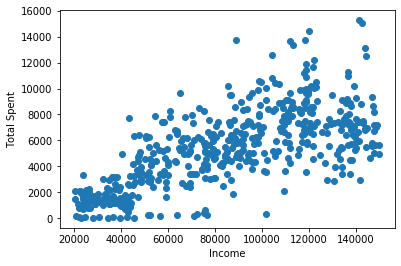

In [198]:
plt.scatter(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.show()

We can see that there is a posistive correlation bewteen Income and Total spent

### Comparing AGE and Total Spent

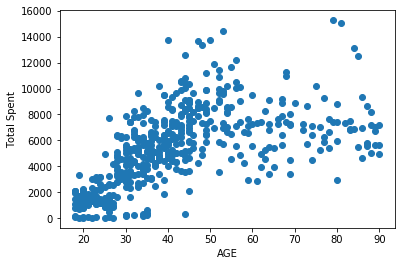

In [199]:
plt.scatter(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])
plt.xlabel('AGE')
plt.ylabel('Total Spent')
plt.show()

We can see that there is a positive correlation between Total spent and AGE

#### COMPARING LOYALTY GROUP and TOTAL SPENT, Since LOYALTY GROUP is a dicrete variable and Total Spent is a continuous variable,
we will have to bin the Total spent into 10, so that we can evaluate how the Loyalty group changes over Total Spent

In [200]:
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['TOTAL SPENT'],10)
customer_all_view['TOTAL SPENT BINNED'].value_counts()

(6117.455, 7641.817]      100
(4593.094, 6117.455]       98
(3068.733, 4593.094]       71
(4.766, 1544.371]          68
(7641.817, 9166.178]       59
(1544.371, 3068.733]       56
(9166.178, 10690.539]      29
(10690.539, 12214.9]        9
(12214.9, 13739.262]        7
(13739.262, 15263.623]      3
Name: TOTAL SPENT BINNED, dtype: int64

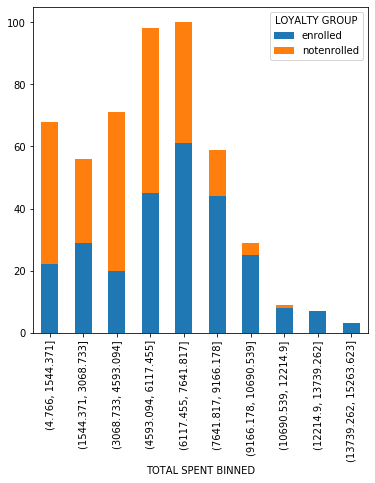

In [201]:
table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar',stacked=True, figsize=(6,6))

With this visuals we can observe that As the Total spent increases, the more people that are spending are the ones that are enrolled,compared to the Nonenrolled customers

#### comparing experience score and total spent 

Since the experience score is discrete(1-10), and the total spent is a continuous variable, we can group the Total spent of the different scores and compare 

In [202]:
experience_score_spend = customer_all_view.groupby(customer_all_view['EXPERIENCE SCORE']).agg({'TOTAL SPENT':'mean'}).reset_index()

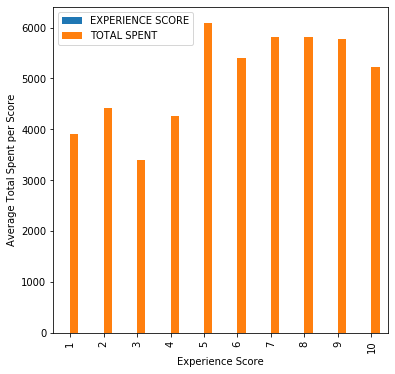

In [203]:
experience_score_spend.plot(kind='bar',figsize=(6,6))
plt.xlabel("Experience Score")
plt.ylabel("Average Total Spent per Score")
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])    
plt.show()

#### Comparing Household and Total spent 

Here lets see how many unique values we have for our Household size 

In [209]:
customer_all_view['HOUSEHOLD SIZE'].value_counts()

1    121
2    113
3    104
4     72
6     50
5     40
Name: HOUSEHOLD SIZE, dtype: int64

In [210]:
household_size_spend = customer_all_view.groupby(customer_all_view['HOUSEHOLD SIZE']).agg({'TOTAL SPENT':'mean'}).reset_index()

In [211]:
customer_all_view.head(5)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT,AGE BINNED,TOTAL SPENT BINNED
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770,"(61.2, 68.4]","(6117.455, 7641.817]"
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451,"(39.6, 46.8]","(4593.094, 6117.455]"
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440,"(39.6, 46.8]","(7641.817, 9166.178]"
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694,"(32.4, 39.6]","(4593.094, 6117.455]"
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512,"(25.2, 32.4]","(4.766, 1544.371]"


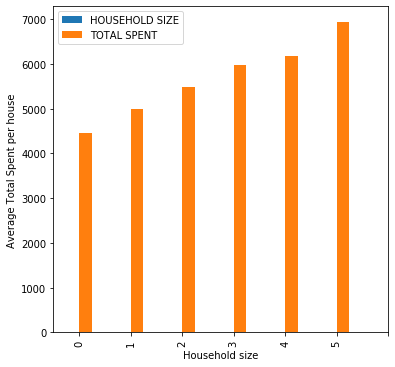

In [213]:
household_size_spend.plot(kind='bar',figsize=(6,6))
plt.xlabel("Household size")
plt.ylabel("Average Total Spent per house")
plt.xticks([0,1,2,3,4,5,6])    
plt.show()

In [214]:
household_size_spend.head()

,HOUSEHOLD SIZE,TOTAL SPENT
0,1,4456.694694
1,2,4986.064168
2,3,5472.324452
3,4,5962.874875
4,5,6167.663050


### USING OUR SELECTED VARIABLES IN OUR REGRESSION TRAINING 
INCOME, AGE, LOYALTY GROUP, EXPERIENCE SCORE ,HOUSEHOLD SIZE

In [215]:
RF_input = customer_all_view[['INCOME','AGE','LOYALTY GROUP','EXPERIENCE SCORE','HOUSEHOLD SIZE']]

In [216]:
RF_input.head(3)

,INCOME,AGE,LOYALTY GROUP,EXPERIENCE SCORE,HOUSEHOLD SIZE
0,133498,64,enrolled,5,4
1,94475,42,notenrolled,9,6
2,88610,40,enrolled,9,5


2) Making our Loyalty group a numeric column so it can be inputed for further learning

In [219]:
RF_input.loc[RF_input['LOYALTY GROUP'] == 'enrolled', 'Loyalty Group'] = 1
RF_input.loc[RF_input['LOYALTY GROUP'] == 'notenrolled', 'Loyalty Group'] = 0

In [220]:
RF_input.head()

,INCOME,AGE,LOYALTY GROUP,EXPERIENCE SCORE,HOUSEHOLD SIZE,Loyalty Group
0,133498,64,enrolled,5,4,1.0
1,94475,42,notenrolled,9,6,0.0
2,88610,40,enrolled,9,5,1.0
3,84313,38,enrolled,8,1,1.0
4,51498,30,notenrolled,3,1,0.0


In [221]:
RF_input = RF_input.drop(['LOYALTY GROUP'],axis=1)

In [222]:
RF_input.head()

,INCOME,AGE,EXPERIENCE SCORE,HOUSEHOLD SIZE,Loyalty Group
0,133498,64,5,4,1.0
1,94475,42,9,6,0.0
2,88610,40,9,5,1.0
3,84313,38,8,1,1.0
4,51498,30,3,1,0.0


3) All our data is numeric, now we can scale our figures using preprocessing 

In [224]:
from sklearn import preprocessing 

In [225]:
RF_input_columns = RF_input.columns.values

In [226]:
RF_input_columns

array(['INCOME', 'AGE', 'EXPERIENCE SCORE', 'HOUSEHOLD SIZE',
       'Loyalty Group'], dtype=object)

In [227]:
RF_input_scaled = preprocessing.minmax_scale(RF_input)

In [229]:
RF_input_upgd = pd.DataFrame(RF_input_scaled,columns=RF_input_columns)

In [230]:
RF_input_upgd.head()

,INCOME,AGE,EXPERIENCE SCORE,HOUSEHOLD SIZE,Loyalty Group
0,0.872818,0.638889,0.444444,0.6,1.0
1,0.572046,0.333333,0.888889,1.0,0.0
2,0.526842,0.305556,0.888889,0.8,1.0
3,0.493722,0.277778,0.777778,0.0,1.0
4,0.240799,0.166667,0.222222,0.0,0.0


#### Splitting our Data sets 

In [231]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(RF_input_upgd,customer_all_view['TOTAL SPENT'], test_size =0.2,random_state=42)

Training our Data

In [232]:
from sklearn.linear_model import LinearRegression  


In [233]:
linreg = LinearRegression()

In [234]:
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [236]:
Y_pred = linreg.predict(X_test)

In [237]:
linreg.coef_

array([12603.96588313, -7303.9974324 ,   490.22335566,   922.7433108 ,
        1554.3041761 ])

In [238]:
linreg.intercept_

-19.818030305365028

In [240]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [242]:
print("Mean squared error: %.2f"% mean_squared_error(Y_test,Y_pred))

Mean squared error: 3158351.48


In [243]:
r2_score(Y_test,Y_pred)

0.5927110590249095